# Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

## Beijing A

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val on Beijing A.')

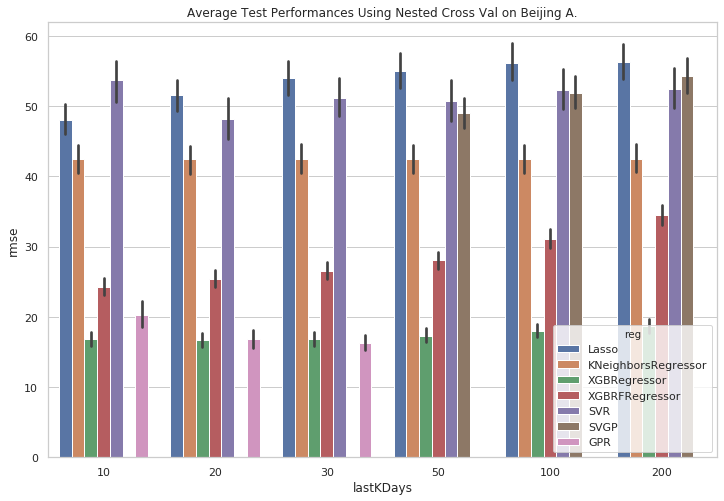

In [2]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST']:
    try:
        odf = pd.read_csv(f"./results/beijinga_scaled/{reg}/final.csv")
        temp.append(odf[odf["is_val_error"] == False])
    except:
        pass
df = pd.concat(temp)

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="reg")
plt.title(f"Average Test Performances Using Nested Cross Val on Beijing A.")

In [3]:
df[df["reg"] == "XGBRegressor"].groupby('lastKDays').mean()

,is_val_error,stepSize,kout,kin,time_ix,hy_ix,rmse,mae
lastKDays,,,,,,,,
10,False,2.0,2.5,-1.0,193.0,12.0,16.820791,13.007565
20,False,2.0,2.5,-1.0,193.0,12.0,16.682750,12.921596
30,False,2.0,2.5,-1.0,193.0,12.0,16.867541,13.152681
50,False,2.0,2.5,-1.0,193.0,12.0,17.316363,13.603887
100,False,2.0,2.5,-1.0,193.0,12.0,18.024466,14.266035
200,False,2.0,2.5,-1.0,193.0,12.0,18.673763,14.874161


## Beijing B

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val on Beijing B.')

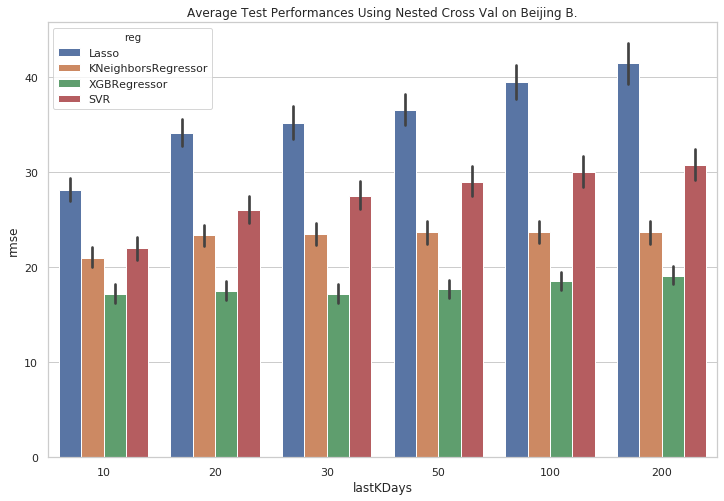

In [4]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST', "gpFULL"]:
    try:
        odf = pd.read_csv(f"./results/beijingb_scaled/{reg}/final.csv")
        temp.append(odf[odf["is_val_error"] == False])
    except:
        pass
df = pd.concat(temp)

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="reg")
plt.title(f"Average Test Performances Using Nested Cross Val on Beijing B.")

In [5]:
df[df["reg"] == "XGBRegressor"].groupby('lastKDays').mean()

,is_val_error,stepSize,kout,kin,time_ix,hy_ix,rmse,mae
lastKDays,,,,,,,,
10,False,2.0,2.5,-1.0,193.0,12.0,17.239761,13.284435
20,False,2.0,2.5,-1.0,193.0,12.0,17.543402,13.583216
30,False,2.0,2.5,-1.0,193.0,12.0,17.205029,13.341834
50,False,2.0,2.5,-1.0,193.0,12.0,17.736480,13.842751
100,False,2.0,2.5,-1.0,193.0,12.0,18.565166,14.564307
200,False,2.0,2.5,-1.0,193.0,12.0,19.124048,15.107328


In [7]:
df[df["reg"] == "XGBRegressor"]

,is_val_error,reg,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
0,True,XGBRegressor,2,50,0,0,29,0,16.846033,11.375293
1,True,XGBRegressor,2,50,0,0,29,1,101.945181,101.082278
2,True,XGBRegressor,2,50,0,0,29,2,71.591660,70.419502
3,True,XGBRegressor,2,50,0,0,29,3,44.921953,43.177113
4,True,XGBRegressor,2,50,0,0,29,4,8.884763,5.619926
...,...,...,...,...,...,...,...,...,...,...
389374,True,XGBRegressor,2,10,5,4,357,8,82.111066,81.524239
389375,True,XGBRegressor,2,10,5,4,357,9,53.117495,52.205773
389376,True,XGBRegressor,2,10,5,4,357,10,10.977276,8.847104
389377,True,XGBRegressor,2,10,5,4,357,11,10.159994,8.693375
